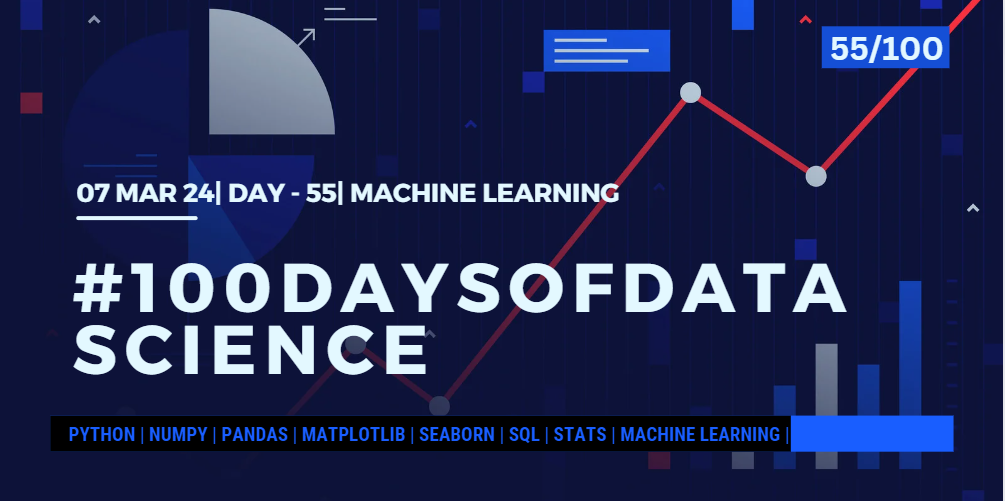

# <center>K-nearest neighbor (KNN)<center><hr style="border:4.5px solid #108999"></hr>
    
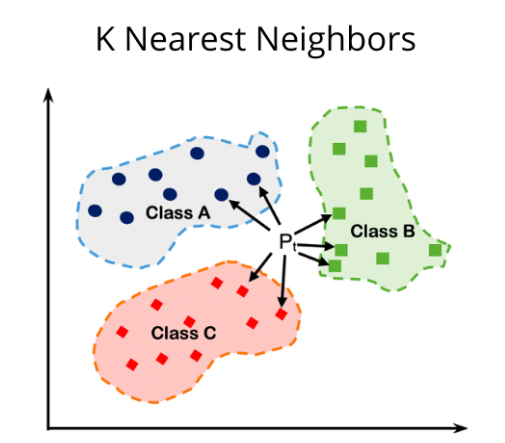
    
* KNN might not be the most complex algorithm out there, but its simplicity and adaptability make it a workhorse in the machine learning world.
*  KNN works based on the idea that similar data points tend to have similar characteristics. This makes it easy to understand and a great starting point for beginners in machine learning.
* Unlike some algorithms that struggle with categorical data, KNN can handle both numerical and categorical features without extensive pre-processing. This makes it applicable to a wide range of datasets.
* KNN uses the concept of distance in the feature space to make predictions. It analyzes the nearest neighbors (closest data points based on features) of a new data point for classification tasks (predicting a category) or regression tasks (predicting a continuous value).
* While not the most powerful for all situations, KNN can be very effective in classification tasks, particularly for datasets with well-defined clusters.
* KNN is a relatively interpretable algorithm. By analyzing the nearest neighbors, you can gain some insights into the factors influencing the predictions.
* Finding nearest neighbors for large datasets can be computationally demanding, which can be a drawback.
* <b>KNN: Strengths and Applications:</b>
    - <b>Simple and Versatile:</b> KNN is easy to understand and implement, making it a great starting point for beginners.
    - <b>Effective for Certain Tasks:</b> KNN excels in classification tasks for datasets with well-defined clusters.
    - <b>No Feature Scaling Required:</b> Unlike some algorithms, KNN doesn't require feature scaling.

* <b>Considerations for KNN:</b>
    - <b>Curse of Dimensionality:</b> KNN's performance can suffer in high-dimensional datasets.
    - <b>Interpretability:</b> While the concept is simple, understanding the impact of individual features can be challenging.
    - <b>Computationally Expensive:</b> For large datasets, finding the nearest neighbors can be computationally demanding.
* <b>Distance Matters:</b> KNN's core principle relies on the concept of distance in the feature space. By analyzing the nearest neighbors (data points closest in terms of features) of a new data point, KNN can make predictions for classification or regression tasks. This approach allows KNN to adapt to the underlying structure of the data without requiring complex feature engineering.

In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Import the Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 55\diabetes.csv',header=0)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape ### Checking Shape

(768, 9)

In [4]:
df.describe() ### Get information of the Dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.columns ### Checking Columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum() ### Checking Null Values in the Data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df1 = pd.DataFrame.copy(df)
df1.shape

(768, 9)

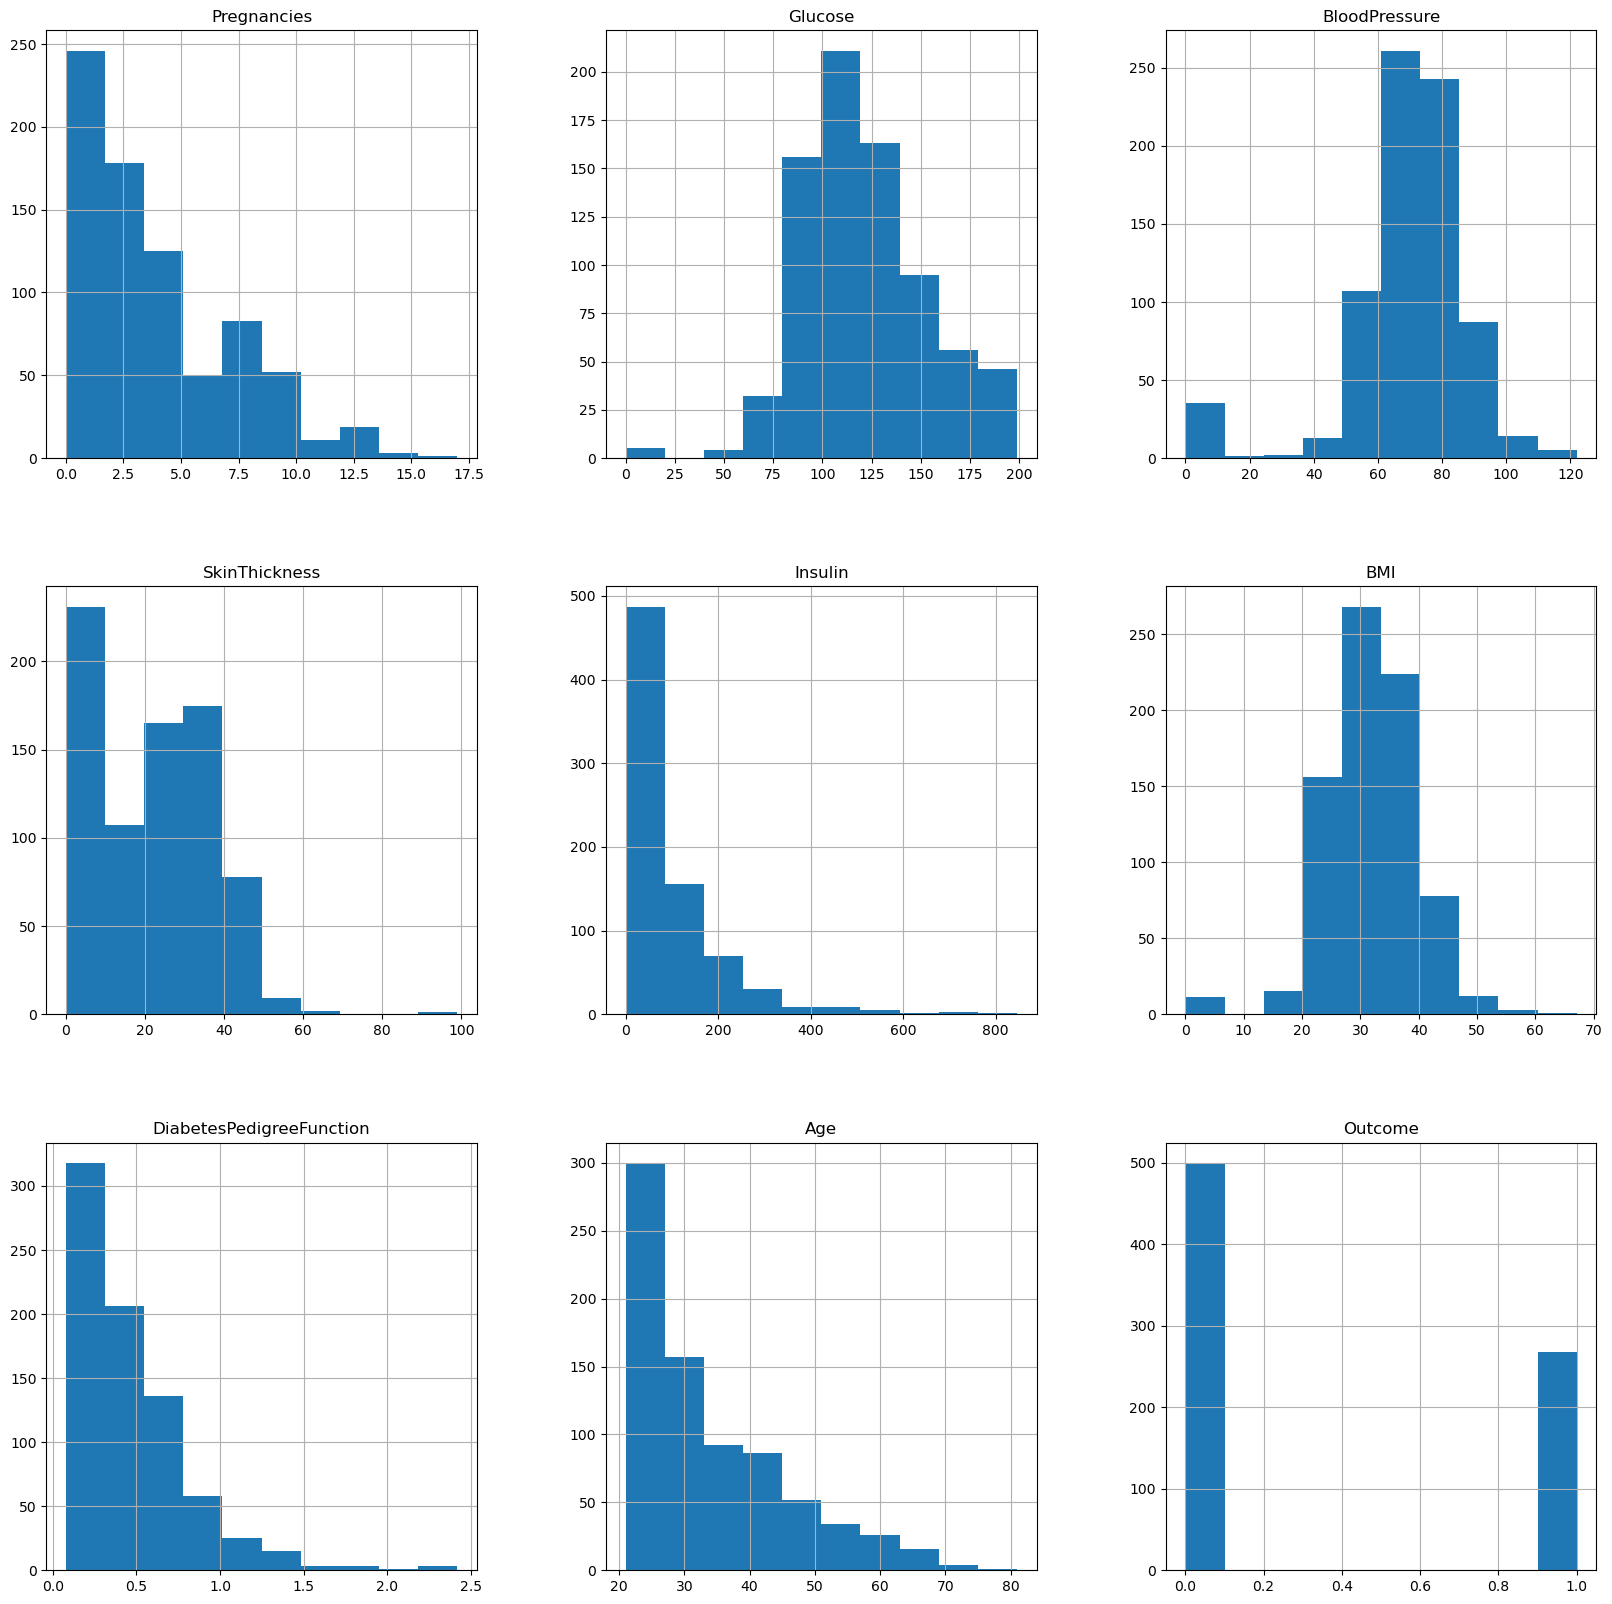

In [9]:
### Visualizing columns
p = df1.hist(figsize = (20,20))

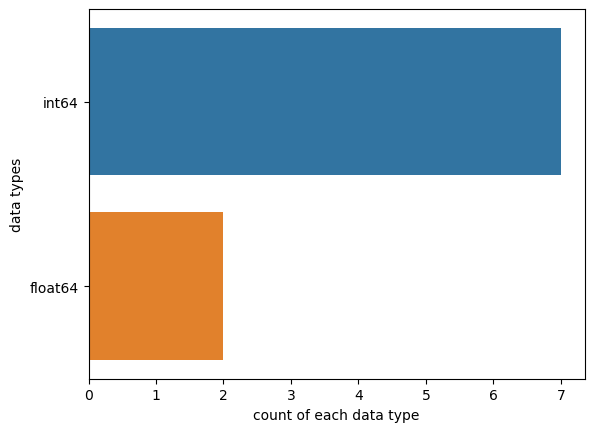

In [10]:
### Checking dtypes
sns.countplot(y=df1.dtypes ,data=df1)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


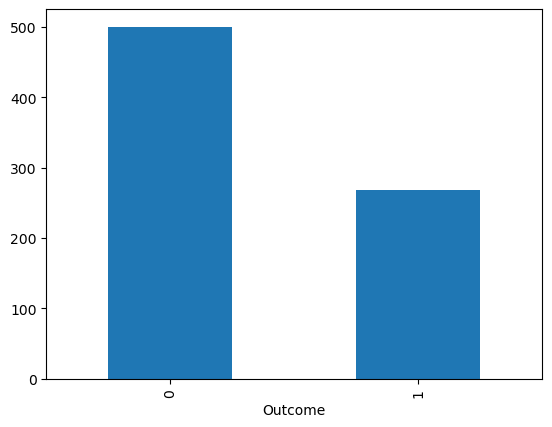

In [11]:
### Checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043",
               3: "#f44336"}
colors = df1["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df1.Outcome.value_counts())
p=df1.Outcome.value_counts().plot(kind="bar")

In [12]:
for i in df1.columns:
    print({i:df1[i].unique()}) ### Checking Unique values in each columns

{'Pregnancies': array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)}
{'Glucose': array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)}
{'BloodPressure': array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  8

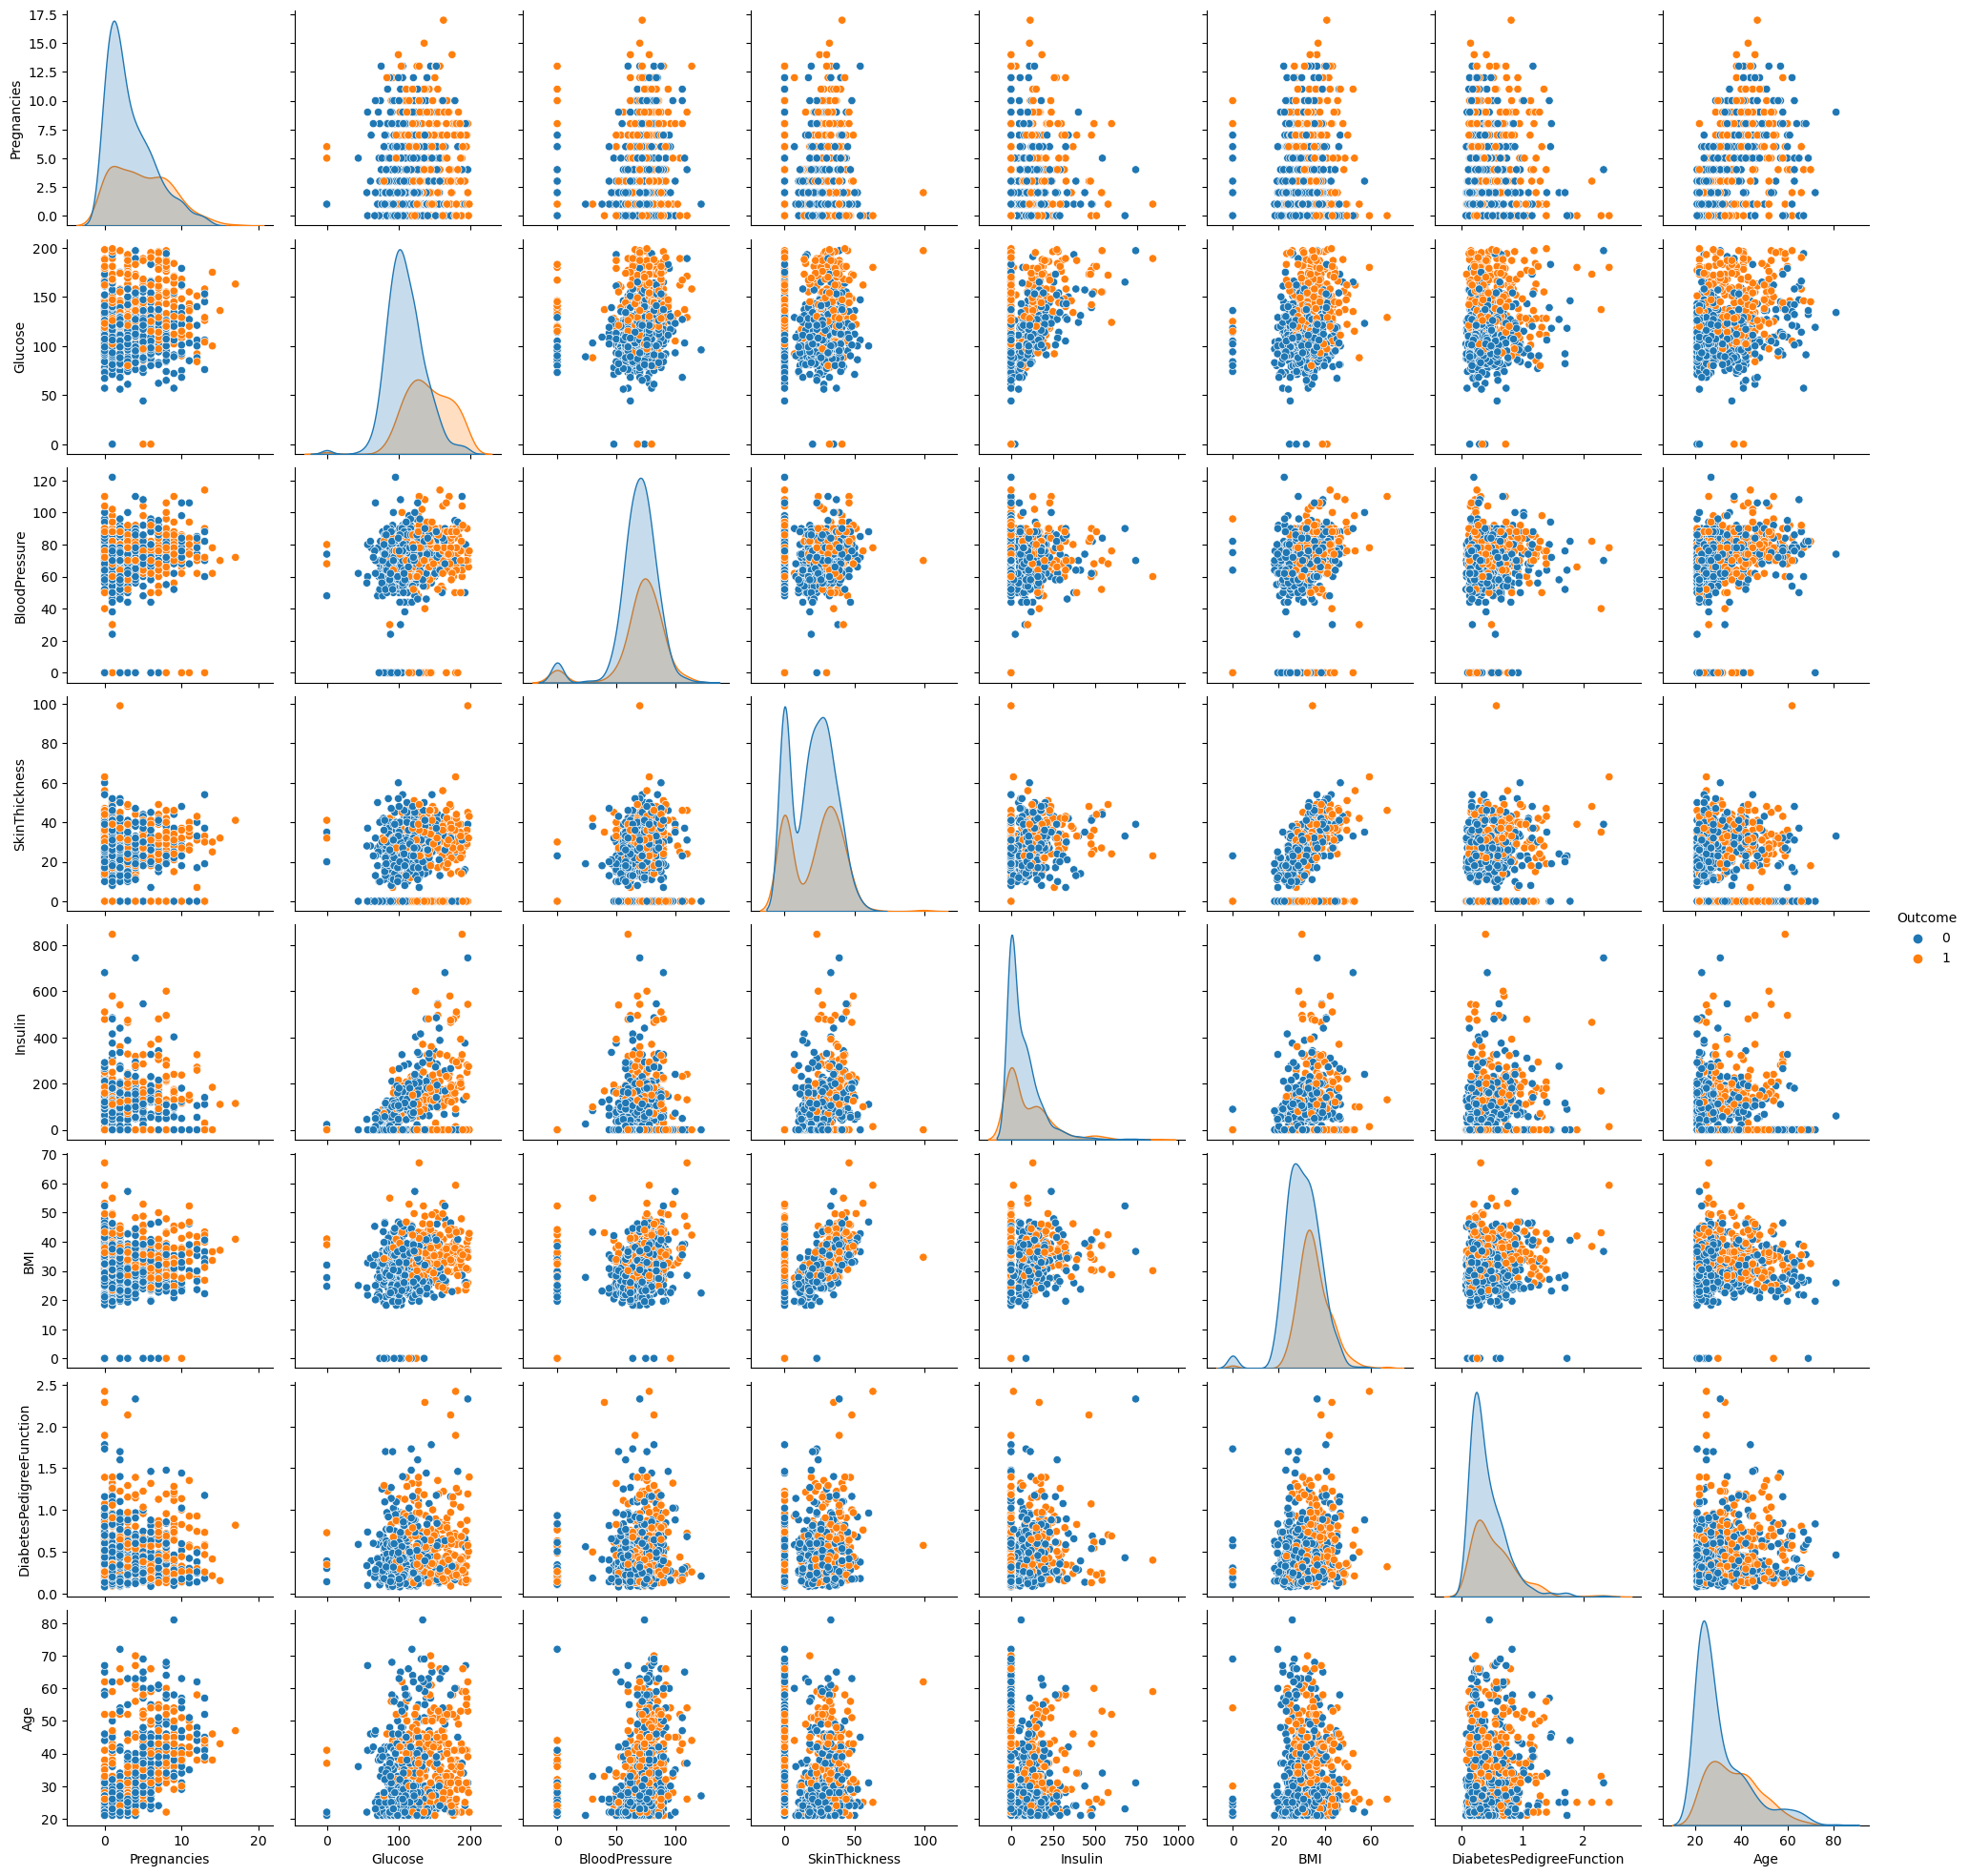

In [13]:
p=sns.pairplot(df1, hue = 'Outcome')

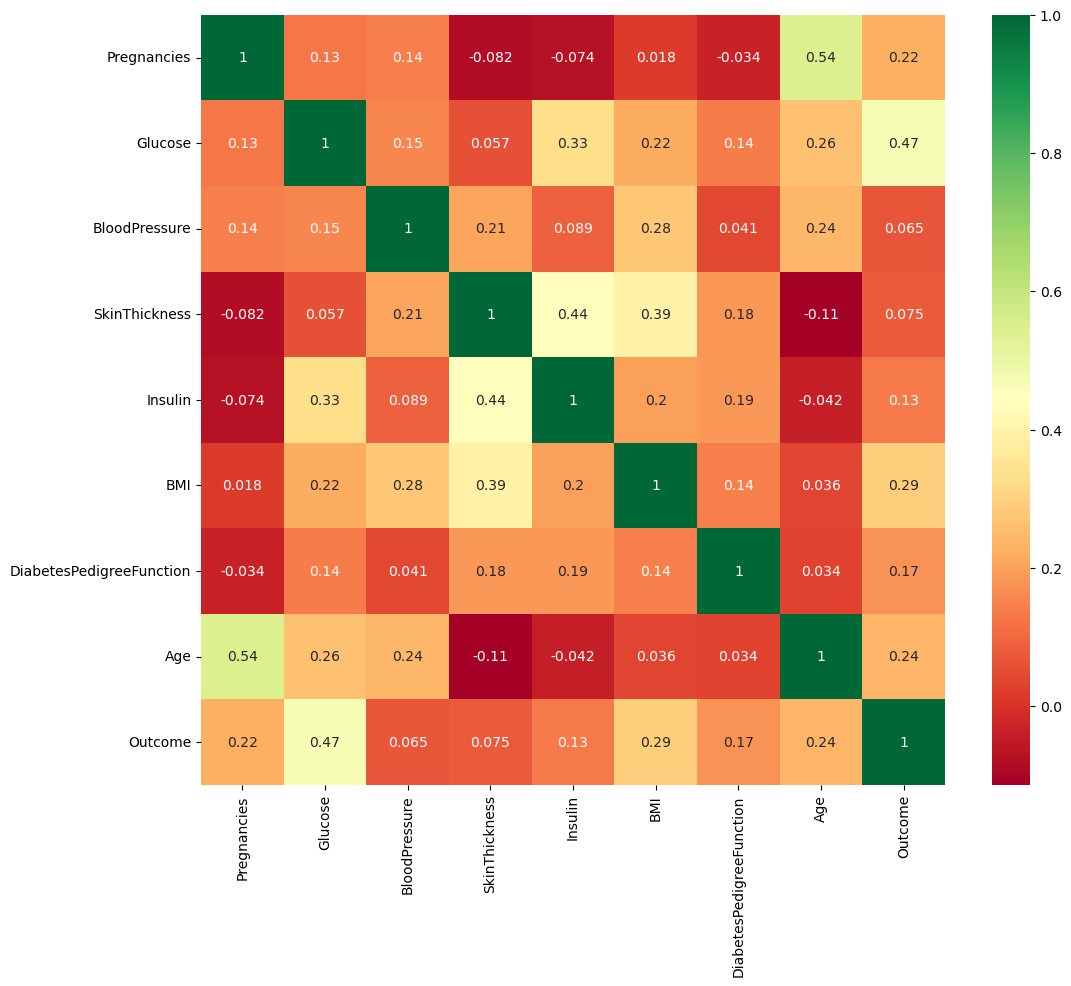

In [14]:
### Visualizaing correlation on Heatmap
plt.figure(figsize=(12,10))  
p=sns.heatmap(df1.corr(), annot=True,cmap ='RdYlGn')

In [15]:
### Finding numerical variables
colname_num = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(colname_num)))
print('The numerical variables are :', colname_num)

There are 9 numerical variables

The numerical variables are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [16]:
df2 = df1.copy()
df2.shape

(768, 9)

In [17]:
for i in colname_num:
    print("Column Names: ", i)
    print("Null Values: ", df2[i].isna().sum())
    print("Mean Values: ",df2[i].mean())
    print("Median Values: ",df2[i].median())
    print("Mode Values: ",df2[i].mode())
    print('-' * 50)

Column Names:  Pregnancies
Null Values:  0
Mean Values:  3.8450520833333335
Median Values:  3.0
Mode Values:  0    1
Name: Pregnancies, dtype: int64
--------------------------------------------------
Column Names:  Glucose
Null Values:  0
Mean Values:  120.89453125
Median Values:  117.0
Mode Values:  0     99
1    100
Name: Glucose, dtype: int64
--------------------------------------------------
Column Names:  BloodPressure
Null Values:  0
Mean Values:  69.10546875
Median Values:  72.0
Mode Values:  0    70
Name: BloodPressure, dtype: int64
--------------------------------------------------
Column Names:  SkinThickness
Null Values:  0
Mean Values:  20.536458333333332
Median Values:  23.0
Mode Values:  0    0
Name: SkinThickness, dtype: int64
--------------------------------------------------
Column Names:  Insulin
Null Values:  0
Mean Values:  79.79947916666667
Median Values:  30.5
Mode Values:  0    0
Name: Insulin, dtype: int64
--------------------------------------------------
Colum

In [18]:
df2.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [19]:
for col in df2.columns:
    print(f"{col} has {df2[col].nunique()} categories\n")

Pregnancies has 17 categories

Glucose has 136 categories

BloodPressure has 47 categories

SkinThickness has 51 categories

Insulin has 186 categories

BMI has 248 categories

DiabetesPedigreeFunction has 517 categories

Age has 52 categories

Outcome has 2 categories



In [20]:
df3 = df2.copy()
df3.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
### Spliting Data into X and y
X = df3.values[:,:-1]
y = df3.values[:,-1]
print('X:',X.shape)
print('*' * 13)
print('y:',y.shape)

X: (768, 8)
*************
y: (768,)


In [22]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#x = scaler.fit_transform(x)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
y = y.astype(int) ### convert y in to integer always perform this operation

In [24]:
### Spliting into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (614, 8)
X_test:  (154, 8)
y_train:  (614,)
y_test:  (154,)


In [25]:
train_scores = []
test_scores = []
#importing model
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    #create a model object
    knn = KNeighborsClassifier(i, metric="manhattan")
    #train the model object
    knn.fit(X_train,y_train)
    #predict score using the model
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [26]:
### Printing train and test scores
print("Train Scores: ",train_scores)
print('-' * 138)
print("Test Scores: ",test_scores)

Train Scores:  [1.0, 0.8436482084690554, 0.8599348534201955, 0.8078175895765473, 0.8078175895765473, 0.8094462540716613, 0.8110749185667753, 0.7964169381107492, 0.7996742671009772, 0.7882736156351792, 0.7850162866449512, 0.7736156351791531, 0.7817589576547231, 0.7768729641693811, 0.7768729641693811, 0.7687296416938111, 0.7736156351791531, 0.7719869706840391, 0.7752442996742671, 0.7719869706840391, 0.7785016286644951, 0.7719869706840391, 0.7866449511400652, 0.7768729641693811, 0.7785016286644951, 0.7801302931596091, 0.7736156351791531, 0.7752442996742671, 0.7719869706840391]
------------------------------------------------------------------------------------------------------------------------------------------
Test Scores:  [0.6623376623376623, 0.6688311688311688, 0.6688311688311688, 0.6753246753246753, 0.6623376623376623, 0.6818181818181818, 0.6883116883116883, 0.7207792207792207, 0.7077922077922078, 0.7337662337662337, 0.7142857142857143, 0.7337662337662337, 0.7142857142857143, 0.740

In [27]:
### Score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [28]:
### Score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.87012987012987 % and k = [26]


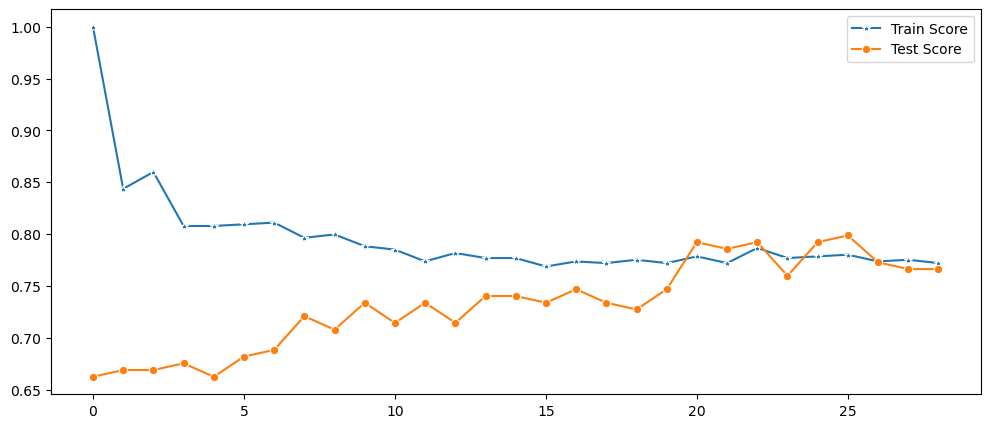

In [29]:
### Visualizing the scores 
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

In [30]:
#importing model
from sklearn.neighbors import KNeighborsClassifier
#create a model object
model_knn = KNeighborsClassifier(26, metric="manhattan")
#train the model object
model_knn.fit(X_train,y_train)
#predict using the model
y_pred = model_knn.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [31]:
# Checking confusion matrix for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px  solid black"})

,0,1
0,93,6
1,25,30


In [32]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        99
           1       0.83      0.55      0.66        55

    accuracy                           0.80       154
   macro avg       0.81      0.74      0.76       154
weighted avg       0.80      0.80      0.79       154

Accuracy of the model:  0.7987012987012987


##### <center> Made with ❤️ by Zahid Salim Shaikh</center>